<a href="https://colab.research.google.com/github/Harshanand7/SOC_2024/blob/main/SOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

from PIL import Image
from keras .preprocessing.image import img_to_array, array_to_img, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import cv2 as cv
import random
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization,Input, concatenate, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.optimizers import Adam
import tensorflow as tf
from keras.utils import plot_model


In [ ]:
filename='/content/archive (7).zip'
filename

'/content/archive (7).zip'

In [ ]:
!ls /content

'archive (7).zip'   sample_data


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile(filename,'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
zip_ref

<zipfile.ZipFile [closed]>

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/asl_dataset'):
    for filename in filenames[:1]:
        print(os.path.join(dirname, filename))


/content/asl_dataset/7/hand2_7_right_seg_3_cropped.jpeg
/content/asl_dataset/e/hand5_e_bot_seg_3_cropped.jpeg
/content/asl_dataset/asl_dataset/7/hand2_7_right_seg_3_cropped.jpeg
/content/asl_dataset/asl_dataset/e/hand5_e_bot_seg_3_cropped.jpeg
/content/asl_dataset/asl_dataset/t/hand5_t_dif_seg_4_cropped.jpeg
/content/asl_dataset/asl_dataset/n/hand2_n_top_seg_2_cropped.jpeg
/content/asl_dataset/asl_dataset/k/hand1_k_right_seg_2_cropped.jpeg
/content/asl_dataset/asl_dataset/l/hand2_l_dif_seg_4_cropped.jpeg
/content/asl_dataset/asl_dataset/a/hand4_a_bot_seg_1_cropped.jpeg
/content/asl_dataset/asl_dataset/g/hand1_g_right_seg_1_cropped.jpeg
/content/asl_dataset/asl_dataset/5/hand1_5_top_seg_1_cropped.jpeg
/content/asl_dataset/asl_dataset/0/hand2_0_left_seg_5_cropped.jpeg
/content/asl_dataset/asl_dataset/q/hand2_q_top_seg_1_cropped.jpeg
/content/asl_dataset/asl_dataset/w/hand1_w_left_seg_3_cropped.jpeg
/content/asl_dataset/asl_dataset/j/hand2_j_top_seg_4_cropped.jpeg
/content/asl_dataset/asl

In [ ]:
for dirname, dirpath, filenames in os.walk('/content/asl_dataset'):
  print(f"there are {len(dirpath)} directories and {len(filenames)} images in '{dirname}'.")


there are 37 directories and 0 images in '/content/asl_dataset'.
there are 0 directories and 70 images in '/content/asl_dataset/7'.
there are 0 directories and 70 images in '/content/asl_dataset/e'.
there are 36 directories and 0 images in '/content/asl_dataset/asl_dataset'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/7'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/e'.
there are 0 directories and 65 images in '/content/asl_dataset/asl_dataset/t'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/n'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/k'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/l'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/a'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/g'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/5'.
there are 0 d

In [ ]:
for dirname, dirpath, filenames in os.walk('/content/asl_dataset'):
  print(f"there are {len(dirpath)} directories and {len(filenames)} images in '{dirname}'.")


there are 37 directories and 0 images in '/content/asl_dataset'.
there are 0 directories and 70 images in '/content/asl_dataset/7'.
there are 0 directories and 70 images in '/content/asl_dataset/e'.
there are 36 directories and 0 images in '/content/asl_dataset/asl_dataset'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/7'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/e'.
there are 0 directories and 65 images in '/content/asl_dataset/asl_dataset/t'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/n'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/k'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/l'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/a'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/g'.
there are 0 directories and 70 images in '/content/asl_dataset/asl_dataset/5'.
there are 0 d

In [ ]:
# create dictionary of relationship between label and sign
categories = {0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",
              10:"a",11:"b",12:"c",13:"d",14:"e",15:"f",16:"g",17:"h",18:"i",
              19:"j",20:"k",21:"l",22:"m",23:"n",24:"o",25:"p",26:"q",27:"r",
              28:"s",29:"t",30:"u",31:"v",32:"w",33:"x",34:"y",35:"z"}

In [ ]:
data_path='/content/asl_dataset/asl_dataset'
root_dir=os.listdir(data_path)
file_list=[]
image_list=[]
label_list=[]

for directory in root_dir:
  directory_path=f"{data_path}/{directory}"
  if not os.path.isdir(directory_path) or directory=='asl_dataset':
    continue
  for files in os.listdir(f"{data_path}/{directory}"):
    file_path=f"{data_path}/{directory}/{files}"
    file_list.append(file_path)
    label_list.append(directory)
    img=imread(file_path)
    image_list.append(np.array(img))
df=pd.DataFrame({'file':file_list,'image':image_list,'label':label_list})
df


,file,image,label
0,/content/asl_dataset/asl_dataset/7/hand2_7_rig...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",7
1,/content/asl_dataset/asl_dataset/7/hand2_7_rig...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",7
2,/content/asl_dataset/asl_dataset/7/hand1_7_dif...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",7
3,/content/asl_dataset/asl_dataset/7/hand4_7_bot...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",7
4,/content/asl_dataset/asl_dataset/7/hand2_7_lef...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",7
...,...,...,...
2510,/content/asl_dataset/asl_dataset/m/hand3_m_dif...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",m
2511,/content/asl_dataset/asl_dataset/m/hand3_m_dif...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",m
2512,/content/asl_dataset/asl_dataset/m/hand2_m_top...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",m
2513,/content/asl_dataset/asl_dataset/m/hand1_m_lef...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",m


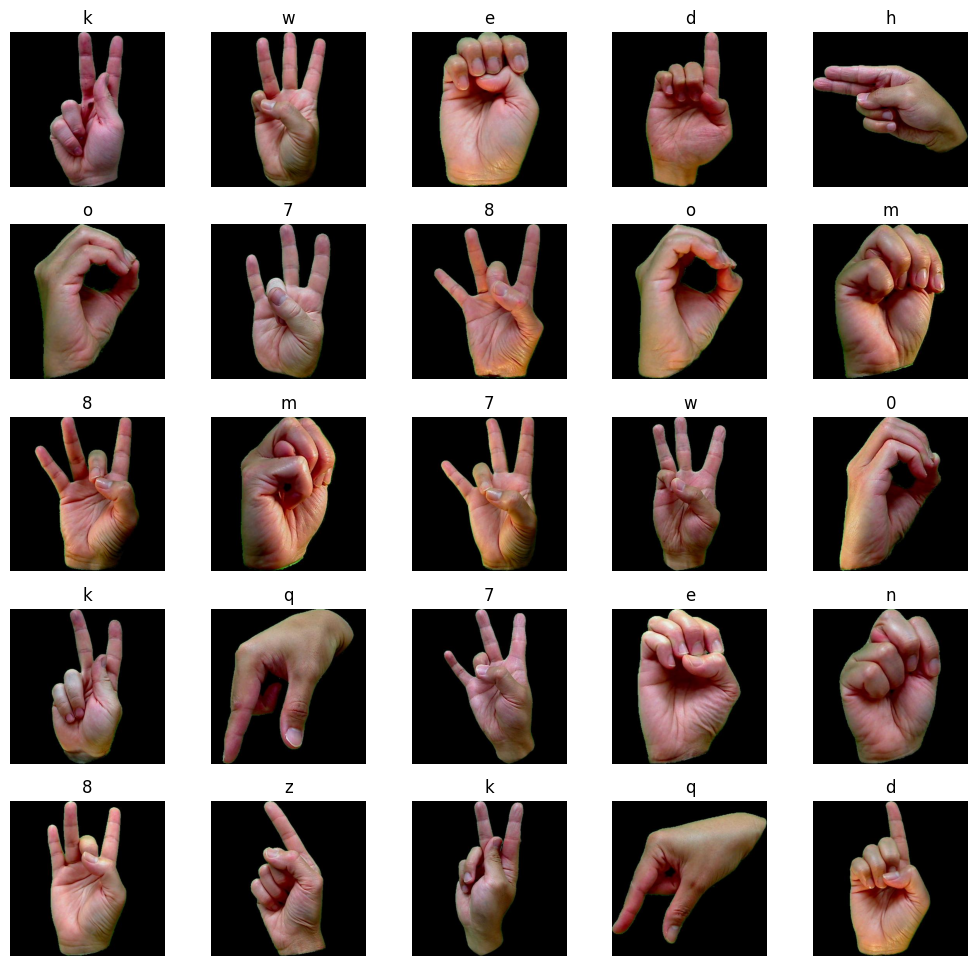

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.tight_layout()
  plt.axis('off')
  randval=random.choice(list(categories.values()))
  randimg=imread(data_path+'/'+randval+'/'+random.choice(sorted(os.listdir(data_path+'/'+randval))))
  plt.title(randval)
  plt.imshow(randimg)

<ipython-input-12-feae6c98e87c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(sign_freq,x='label',y='count',palette='icefire')


Text(0.5, 1.0, 'Count of Images by Sign')

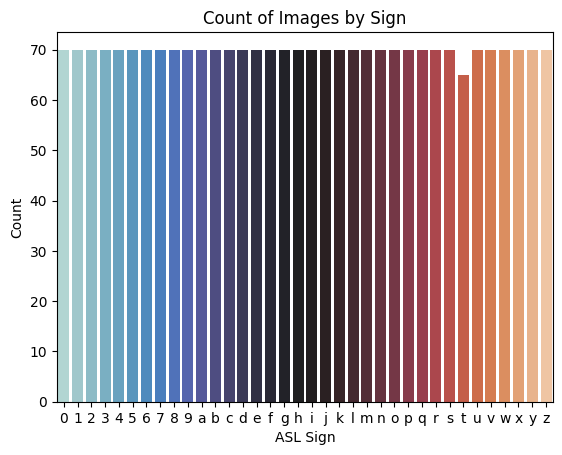

In [ ]:
sign_freq=df['label'].value_counts().reset_index().sort_values('label')
sns.barplot(sign_freq,x='label',y='count',palette='icefire')
plt.xlabel('ASL Sign')
plt.ylabel('Count')
plt.title('Count of Images by Sign')

In [ ]:
# Splitting
x_train,x_test0,y_train,y_test0= train_test_split(df['file'],df['label'],test_size=0.25,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_test0,y_test0,test_size=0.5,random_state=42)
train=pd.concat([x_train,y_train],axis=1).reset_index(drop=True)
val=pd.concat([x_val,y_val],axis=1).reset_index(drop=True)
test=pd.concat([x_test,y_test],axis=1).reset_index(drop=True)
print(np.shape(train))
print(np.shape(val))
print(np.shape(test))

(1886, 2)
(315, 2)
(314, 2)


In [ ]:
train.head()

,file,label
0,/content/asl_dataset/asl_dataset/v/hand2_v_lef...,v
1,/content/asl_dataset/asl_dataset/l/hand2_l_top...,l
2,/content/asl_dataset/asl_dataset/p/hand1_p_dif...,p
3,/content/asl_dataset/asl_dataset/5/hand1_5_top...,5
4,/content/asl_dataset/asl_dataset/3/hand1_3_dif...,3


In [ ]:
image_size=128
batch_size=32
class_size=36

datagen=ImageDataGenerator(rescale=1.0/255)
train_data=datagen.flow_from_dataframe(dataframe=train,x_col='file',y_col='label',
                                      target_size=(image_size,image_size),
                                      batch_size=batch_size,
                                      shuffle=False,
                                      class_mode='categorical')

test_data=datagen.flow_from_dataframe(dataframe=test,x_col='file',y_col='label',
                                      target_size=(image_size,image_size),
                                      batch_size=batch_size,
                                      shuffle=False,
                                      class_mode='categorical')

val_data=datagen.flow_from_dataframe(dataframe=val,x_col='file',y_col='label',
                                      target_size=(image_size,image_size),
                                      batch_size=batch_size,
                                      shuffle=False,
                                      class_mode='categorical')

Found 1886 validated image filenames belonging to 36 classes.
Found 314 validated image filenames belonging to 36 classes.
Found 315 validated image filenames belonging to 36 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(image_size,image_size,3)))
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(36,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 128)               6

In [ ]:
earlystop=EarlyStopping(monitor='val_loss',min_delta=0.0,patience=5,verbose=0,restore_best_weights=True)
reducelr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=2,verbose=1)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
classifier=model.fit(train_data,epochs=10,validation_data=val_data,callbacks=[reducelr,earlystop])

Epoch 1/10
59/59 [==============================] - 10s 64ms/step - loss: 2.1152 - accuracy: 0.4592 - val_loss: 0.5742 - val_accuracy: 0.8159 - lr: 0.0010
Epoch 2/10
59/59 [==============================] - 4s 63ms/step - loss: 0.5931 - accuracy: 0.8208 - val_loss: 0.2410 - val_accuracy: 0.9079 - lr: 0.0010
Epoch 3/10
59/59 [==============================] - 3s 50ms/step - loss: 0.3366 - accuracy: 0.8945 - val_loss: 0.2002 - val_accuracy: 0.9397 - lr: 0.0010
Epoch 4/10
59/59 [==============================] - 3s 48ms/step - loss: 0.2343 - accuracy: 0.9284 - val_loss: 0.1539 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 5/10
59/59 [==============================] - 4s 65ms/step - loss: 0.1730 - accuracy: 0.9427 - val_loss: 0.1587 - val_accuracy: 0.9524 - lr: 0.0010
Epoch 6/10
59/59 [==============================] - 3s 48ms/step - loss: 0.1393 - accuracy: 0.9533 - val_loss: 0.1133 - val_accuracy: 0.9619 - lr: 0.0010
Epoch 7/10
59/59 [==============================] - 3s 50ms/step - loss: 0.

In [ ]:
train_loss,train_accuracy=model.evaluate(train_data)
test_loss,test_accuracy=model.evaluate(test_data)
val_loss,val_accuracy=model.evaluate(val_data)

10/10 [==============================] - 0s 37ms/step - loss: 0.1325 - accuracy: 0.9778


In [ ]:
print('Train Accuracy=', train_accuracy)
print('Test Accuracy=', test_accuracy)
print('Validation Accuracy=', val_accuracy)

Train Accuracy= 1.0
Test Accuracy= 0.9681528806686401
Validation Accuracy= 0.9777777791023254


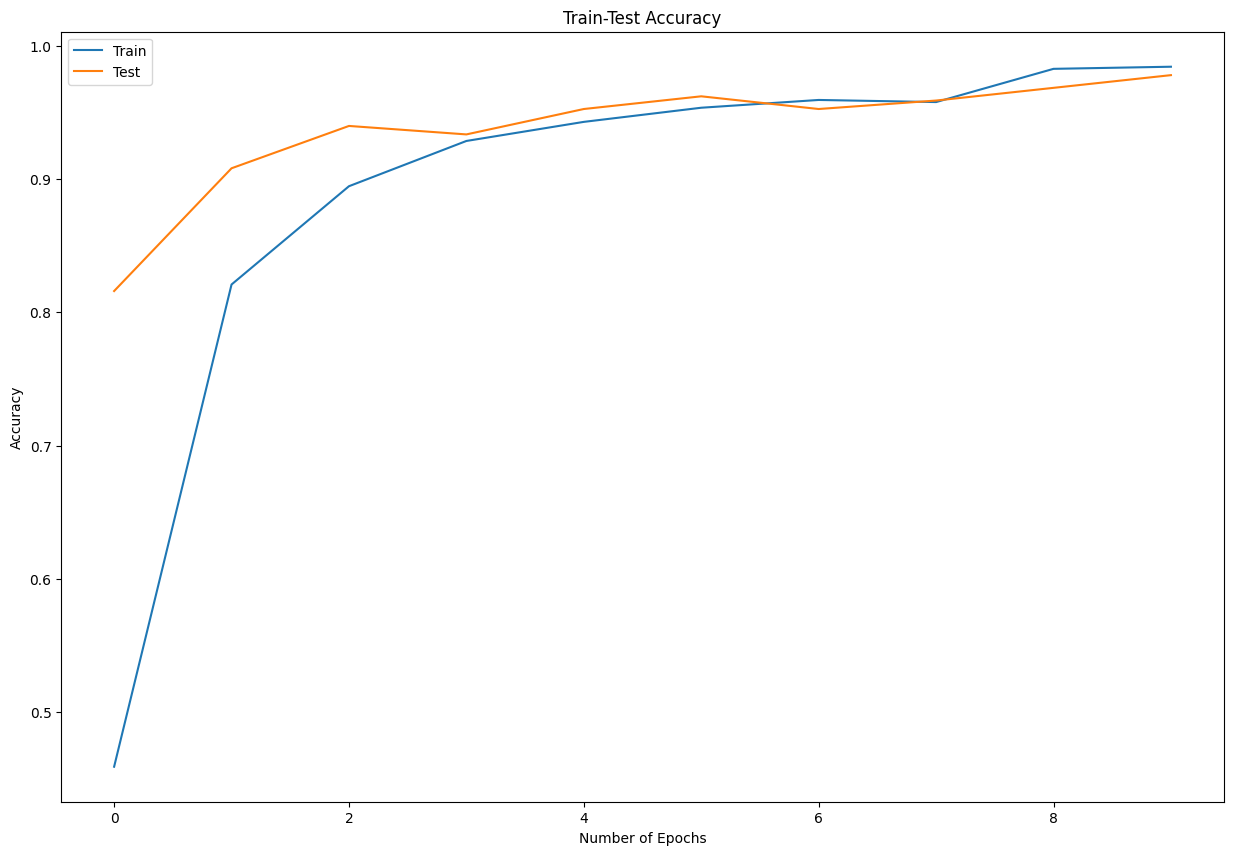

In [ ]:
plt.figure(figsize=(15,10))
epochs=[]
for i in range(10):
  epochs.append(i)
plt.plot(epochs,classifier.history['accuracy'], label="Train")
plt.plot(epochs,classifier.history['val_accuracy'], label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

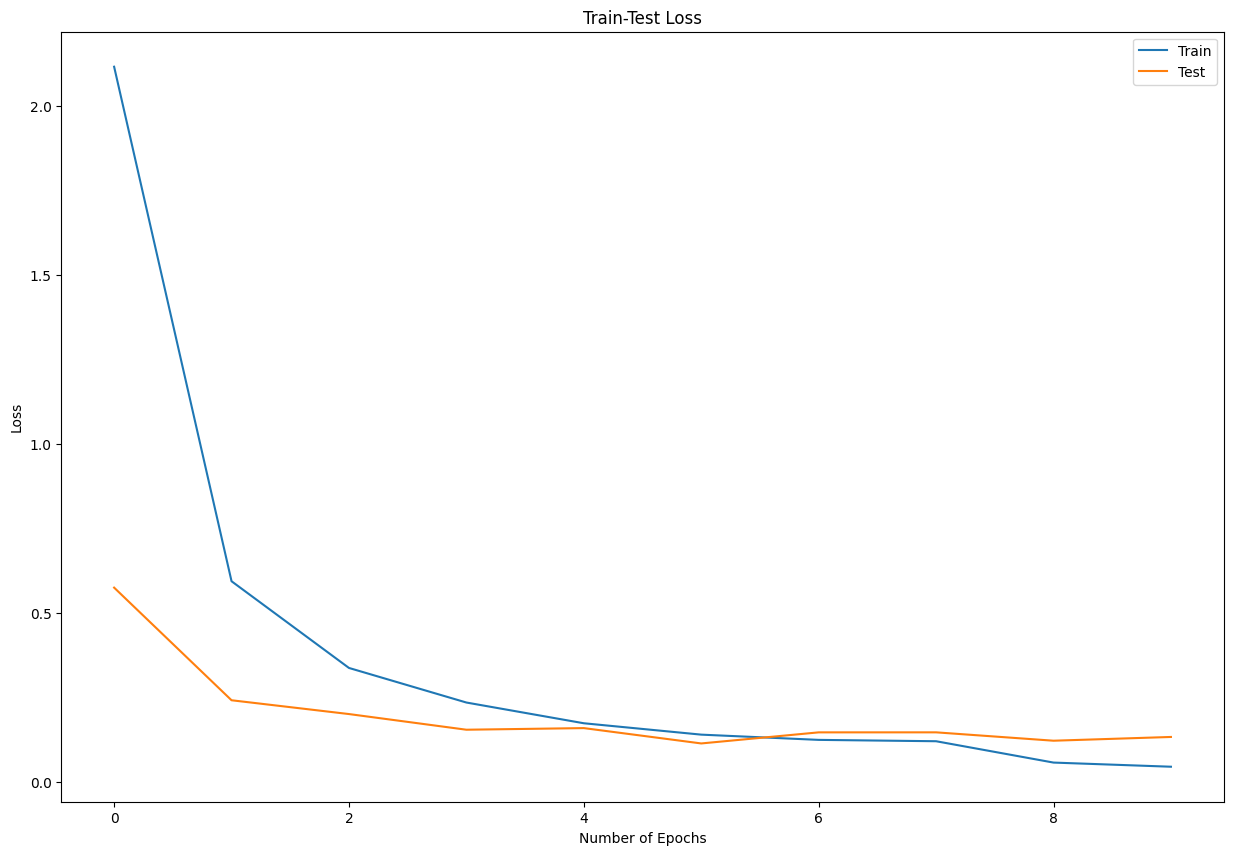

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(epochs,classifier.history['loss'], label="Train")
plt.plot(epochs,classifier.history['val_loss'], label="Test")
plt.title("Train-Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
probs=model.predict(test_data)
y_pred=np.argmax(probs,axis=1)
y_actual=test_data.labels

10/10 [==============================] - 1s 39ms/step


In [ ]:
test_loss,test_accuracy=model.evaluate(test_data,verbose=0)
print('Test Accuracy=', test_accuracy)
print('Test Loss=', test_loss)
correct=np.nonzero(y_pred==y_actual)[0]
incorrect=np.nonzero(y_pred!=y_actual)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0], '\n')
print(classification_report(y_pred, y_actual))

Test Accuracy= 0.9681528806686401
Test Loss= 0.14971059560775757
Correct predicted classes: 304
Incorrect predicted classes: 10 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         7
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         4
          10       0.92      1.00      0.96        11
          11       0.85      1.00      0.92        11
          12       0.89      1.00      0.94         8
          13       1.00      1.00      1.00         5
          14       1.00      0.80      0.89        10
     

Text(158.22222222222223, 0.5, 'Actual')

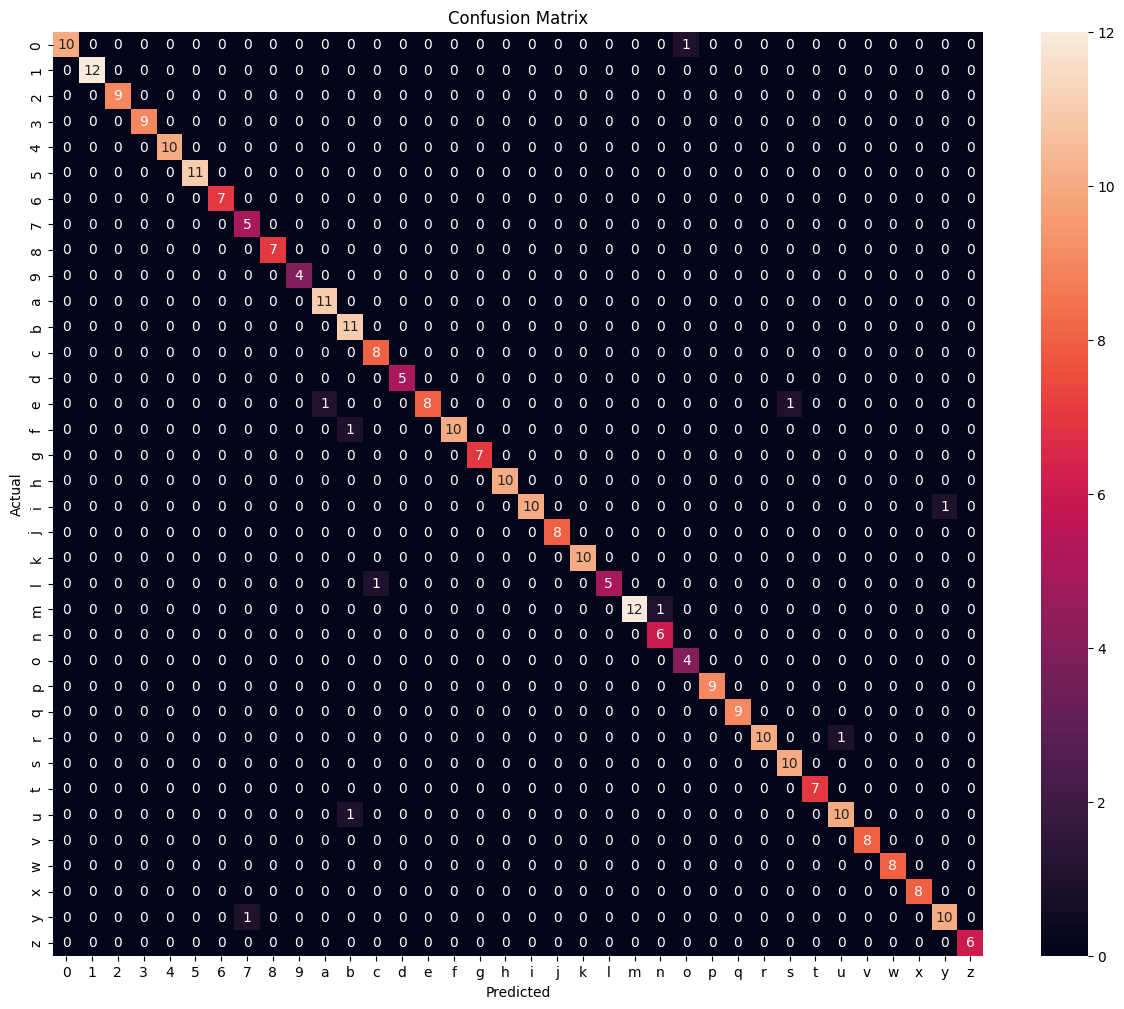

In [ ]:
plt.figure(figsize=(15,12))
matrix=confusion_matrix(y_pred,y_actual)
matrixdf = pd.DataFrame(matrix, index=categories.values(), columns=categories.values())
sns.heatmap(matrixdf,annot=True,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
labeldict={}
for key,value in test_data.class_indices.items():
  labeldict[value]=key
labeldict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'a',
 11: 'b',
 12: 'c',
 13: 'd',
 14: 'e',
 15: 'f',
 16: 'g',
 17: 'h',
 18: 'i',
 19: 'j',
 20: 'k',
 21: 'l',
 22: 'm',
 23: 'n',
 24: 'o',
 25: 'p',
 26: 'q',
 27: 'r',
 28: 's',
 29: 't',
 30: 'u',
 31: 'v',
 32: 'w',
 33: 'x',
 34: 'y',
 35: 'z'}

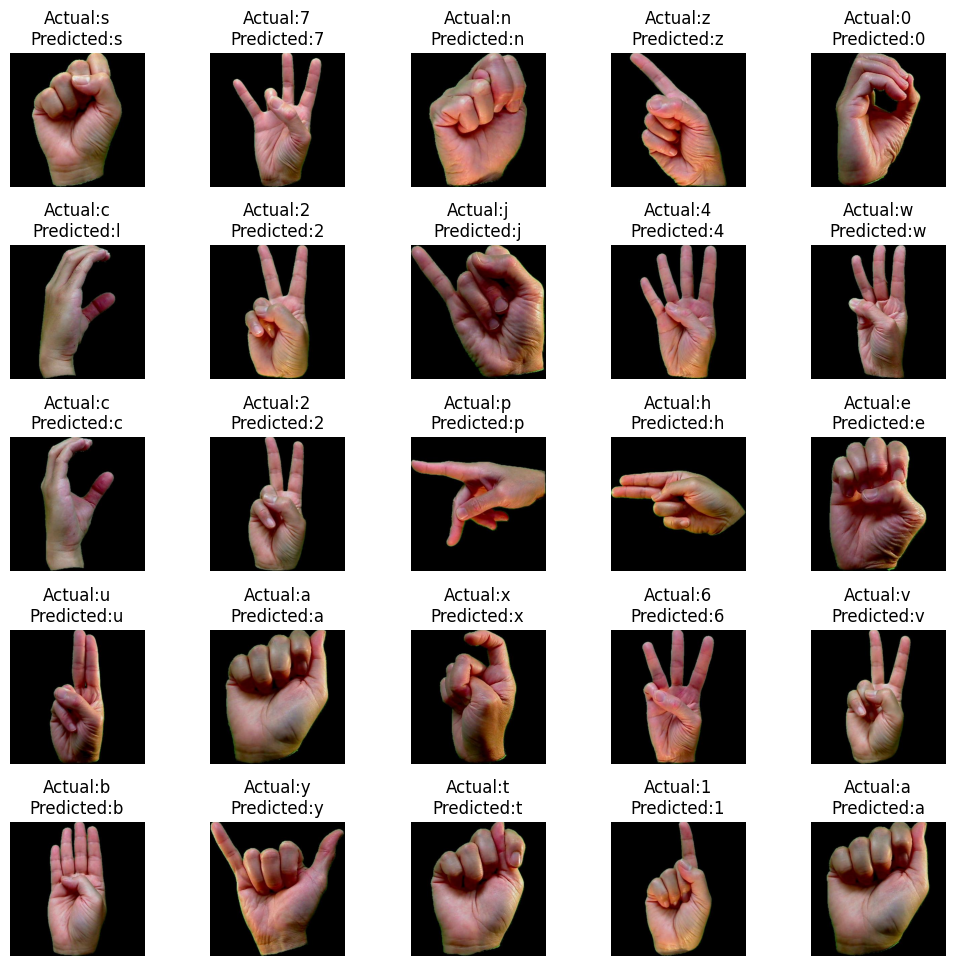

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.tight_layout()
  plt.axis('off')
  randind=random.randint(0,len(test)-1)
  plt.imshow(imread(test.iloc[randind]['file']))
  plt.title(f"Actual:{labeldict[y_actual[randind]]}\nPredicted:{labeldict[y_pred[randind]]}")


In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
trained_model=tf.keras.models.load_model("model.h5")

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import img_to_array

# Load the trained model
model = tf.keras.models.load_model

In [ ]:
("model.h5")

# Define the dictionary of categories
categories = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9",
    10: "a", 11: "b", 12: "c", 13: "d", 14: "e", 15: "f", 16: "g", 17: "h", 18: "i",
    19: "j", 20: "k", 21: "l", 22: "m", 23: "n", 24: "o", 25: "p", 26: "q", 27: "r",
    28: "s", 29: "t", 30: "u", 31: "v", 32: "w", 33: "x", 34: "y", 35: "z"
}

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from PIL import Image as PILImage
from io import BytesIO
from base64 import b64decode, b64encode
from google.colab.patches import cv2_imshow
# Load the trained model
model = load_model('model.h5')

# Define the dictionary of categories
categories = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9",
    10: "a", 11: "b", 12: "c", 13: "d", 14: "e", 15: "f", 16: "g", 17: "h", 18: "i",
    19: "j", 20: "k", 21: "l", 22: "m", 23: "n", 24: "o", 25: "p", 26: "q", 27: "r",
    28: "s", 29: "t", 30: "u", 31: "v", 32: "w", 33: "x", 34: "y", 35: "z"
}

def preprocess_frame(frame):
    image_size = 128
    frame = cv2.resize(frame, (image_size, image_size))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = frame.astype('float32') / 255.0
    return frame

def js_to_image(js_data):
    """Convert base64-encoded image data from JS to a numpy array."""
    binary = b64decode(js_data.split(',')[1])
    image = PILImage.open(BytesIO(binary))
    return np.array(image)

def video_stream():
    js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
        stream.getVideoTracks()[0].stop();
        video.remove();
        div.remove();
        video = null;
        div = null;
        stream = null;
        imgElement = null;
        captureCanvas = null;
        labelElement = null;
    }

    function onAnimationFrame() {
        if (!shutdown) {
            window.requestAnimationFrame(onAnimationFrame);
        }
        if (pendingResolve) {
            var result = "";
            if (!shutdown) {
                captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
                result = captureCanvas.toDataURL('image/jpeg', 0.8);
            }
            var lp = pendingResolve;
            pendingResolve = null;
            lp(result);
        }
    }

    async function createDom() {
        if (div !== null) {
            return stream;
        }

        div = document.createElement('div');
        div.style.border = '2px solid black';
        div.style.padding = '3px';
        div.style.width = '100%';
        div.style.maxWidth = '600px';
        document.body.appendChild(div);

        const modelOut = document.createElement('div');
        modelOut.innerHTML = "<span>Status:</span>";
        labelElement = document.createElement('span');
        labelElement.innerText = 'No data';
        labelElement.style.fontWeight = 'bold';
        modelOut.appendChild(labelElement);
        div.appendChild(modelOut);

        video = document.createElement('video');
        video.style.display = 'block';
        video.width = div.clientWidth - 6;
        video.setAttribute('playsinline', '');
        video.onclick = () => { shutdown = true; };
        stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
        div.appendChild(video);

        imgElement = document.createElement('img');
        imgElement.style.position = 'absolute';
        imgElement.style.zIndex = 1;
        imgElement.onclick = () => { shutdown = true; };
        div.appendChild(imgElement);

        const instruction = document.createElement('div');
        instruction.innerHTML = '<span style="color: red; font-weight: bold;">' +
                                'When finished, click here or on the video to stop this demo</span>';
        div.appendChild(instruction);
        instruction.onclick = () => { shutdown = true; };

        video.srcObject = stream;
        await video.play();

        captureCanvas = document.createElement('canvas');
        captureCanvas.width = 640; //video.videoWidth;
        captureCanvas.height = 480; //video.videoHeight;
        window.requestAnimationFrame(onAnimationFrame);

        return stream;
    }
    async function stream_frame(label, imgData) {
        if (shutdown) {
            removeDom();
            shutdown = false;
            return '';
        }

        var preCreate = Date.now();
        stream = await createDom();

        var preShow = Date.now();
        if (label != "") {
            labelElement.innerHTML = label;
        }

        if (imgData != "") {
            var videoRect = video.getClientRects()[0];
            imgElement.style.top = videoRect.top + "px";
            imgElement.style.left = videoRect.left + "px";
            imgElement.style.width = videoRect.width + "px";
            imgElement.style.height = videoRect.height + "px";
            imgElement.src = imgData;
        }

        var preCapture = Date.now();
        var result = await new Promise(function(resolve, reject) {
            pendingResolve = resolve;
        });
        shutdown = false;

        return {'create': preShow - preCreate,
                'show': preCapture - preShow,
                'capture': Date.now() - preCapture,
                'img': result};
    }
    ''')

    display(js)

def video_frame(label, imgData):
    # Encode the binary image data to base64
    imgData_b64 = b64encode(imgData).decode() if imgData else ""
    data = eval_js(f'stream_frame("{label}", "{imgData_b64}")') # Pass the base64 encoded data
    return data

# Start streaming video from webcam
video_stream()

def bbox_to_bytes(bbox_array):
    """Convert bounding box array to bytes."""
    _, encoded_img = cv2.imencode('.png', bbox_array)
    return encoded_img.tobytes()

def predict_gestures():
    label_html = 'Capturing...'
    bbox = ''
    count = 0
    while True:
        js_reply = video_frame(label_html, bbox)
        if not js_reply:
            break

        # Convert JS response to OpenCV Image
        img = js_to_image(js_reply["img"])

        # Preprocess the image
        processed_frame = preprocess_frame(img)
        predictions = model.predict(processed_frame)
        predicted_class = np.argmax(predictions)
        predicted_label = categories[predicted_class]



        # Create transparent overlay for bounding box (if needed)
        bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)
        # Add predicted label to the bounding box (or overlay)
        cv2.putText(bbox_array, f'Predicted: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0).astype(int) * 255
        bbox_bytes = bbox_to_bytes(bbox_array)
        bbox = bbox_bytes

        # Update label on the UI
        label_html = f'Predicted: {predicted_label}'

predict_gestures()


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 24ms/step


KeyboardInterrupt: 

In [ ]:
model.weights()

In [ ]:
from IPython.display import Image
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model



def preprocess_frame(frame):
    image_size = 128
    frame = cv2.resize(frame, (image_size, image_size))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = frame.astype('float32') / 255.0
    return frame

try:
    # Capture image
    filename = take_photo()  # Ensure this function captures a photo and returns the filename
    print('Saved to {}'.format(filename))

    # Load the image
    image = cv2.imread(filename)
    if image is None:
        raise ValueError("Image could not be loaded.")

    # Preprocess the image
    processed_frame = preprocess_frame(image)
    predictions = model.predict(processed_frame)
    predicted_label = np.argmax(predictions,axis=1)
    # predicted_label = categories[predicted_class]

    # Add prediction label to the image
    cv2.putText(image, f'Predicted: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the result
    cv2.imshow('Sign Language Gesture Recognition', image)

    # Wait until any key is pressed
    cv2.waitKey(0)
    cv2.destroyAllWindows()

except Exception as err:
    print(f'Error: {err}')


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
cap = filename

# Define the image size and preprocess function
image_size = 128

def preprocess_frame(frame):
    frame = cv2.resize(frame, (image_size, image_size))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = frame.astype('float32') / 255.0
    return frame

In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    processed_frame = preprocess_frame(frame)
    predictions = model.predict(processed_frame)
    predicted_class = np.argmax(predictions)
    predicted_label = categories[predicted_class]

    # Display the result
    cv2.putText(frame, f'Predicted: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Sign Language Gesture Recognition', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
